<a href="https://colab.research.google.com/github/kaastha-nl/Retail-Sales-Analytics-EDA/blob/main/Retail_Sales_Analytics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading data from csv
df= pd.read_csv("Retail_Transactions_Dataset.csv")
df. head()

/tmp/ipython-input-1533620671.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Retail_Transactions_Dataset.csv")


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3.0,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2.0,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6.0,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1.0,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10.0,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [7]:
df["Date"] = pd.to_datetime(df["Date"], format='mixed')

In [8]:
# Extracting required time features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68050 entries, 0 to 68049
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction_ID     68050 non-null  int64         
 1   Date               68050 non-null  datetime64[ns]
 2   Customer_Name      68049 non-null  object        
 3   Product            68049 non-null  object        
 4   Total_Items        68049 non-null  float64       
 5   Total_Cost         68049 non-null  float64       
 6   Payment_Method     68049 non-null  object        
 7   City               68049 non-null  object        
 8   Store_Type         68049 non-null  object        
 9   Discount_Applied   68049 non-null  object        
 10  Customer_Category  68049 non-null  object        
 11  Season             68049 non-null  object        
 12  Promotion          45465 non-null  object        
 13  Year               68050 non-null  int32         
 14  Month 

In [9]:
#cleaning data by droping duplicates
df = df.drop_duplicates()


In [10]:
# Total transactions
Total_Transactions=df['Transaction_ID'].count()
print(Total_Transactions)

68050


In [11]:
# Unique customers
Unique_Customers = df['Customer_Name'].nunique()
print(Unique_Customers)

51942


In [16]:
# Total revenue

Total_revenue = df['Total_Cost'].sum()
print(f"${Total_revenue}")

$3562761.53


In [17]:
# Average spend per transaction
Average_spend = df['Total_Cost'].mean()
print(f"${Average_spend}")

$52.35582492027803


In [18]:
# Top 5 most common products
Top_Products = df['Product'].value_counts().head(5)
print(Top_Products)

Product
['Toothpaste']    346
['Beef']          202
['Tuna']          201
['Shrimp']        192
['Dishware']      191
Name: count, dtype: int64


In [19]:
# Cities with highest number of transactions
Highest_Transaction_Cities = df['City'].value_counts()
print(Highest_Transaction_Cities)

City
Seattle          6893
Boston           6888
Atlanta          6872
Chicago          6849
San Francisco    6825
Houston          6820
Los Angeles      6788
Dallas           6742
New York         6690
Miami            6682
Name: count, dtype: int64


In [20]:
# Average spend per customer category
Top_Customer_categories_avg= df.groupby('Customer_Category')['Total_Cost'].mean()
print(Top_Customer_categories_avg)

Customer_Category
Homemaker         52.363176
Middle-Aged       52.317754
Professional      52.934274
Retiree           52.422651
Senior Citizen    51.934154
Student           52.349247
Teenager          52.319609
Young Adult       52.209455
Name: Total_Cost, dtype: float64


In [21]:
# Payment method preference by customer category
Preferred_Payment_Methods = df.groupby('Customer_Category')['Payment_Method'].value_counts()
print(Preferred_Payment_Methods)

Customer_Category  Payment_Method
Homemaker          Credit Card       2164
                   Cash              2156
                   Debit Card        2128
                   Mobile Payment    2095
Middle-Aged        Debit Card        2102
                   Mobile Payment    2078
                   Cash              2077
                   Credit Card       2068
Professional       Cash              2188
                   Mobile Payment    2138
                   Credit Card       2120
                   Debit Card        2052
Retiree            Credit Card       2179
                   Mobile Payment    2171
                   Cash              2097
                   Debit Card        2090
Senior Citizen     Credit Card       2221
                   Debit Card        2121
                   Mobile Payment    2121
                   Cash              2119
Student            Credit Card       2155
                   Cash              2147
                   Debit Card        2067


In [22]:
# Top payment method preference by customer category
Preferred_Payment_Methods2 = Preferred_Payment_Methods.groupby(level=0).head(1)
print(Preferred_Payment_Methods2)

Customer_Category  Payment_Method
Homemaker          Credit Card       2164
Middle-Aged        Debit Card        2102
Professional       Cash              2188
Retiree            Credit Card       2179
Senior Citizen     Credit Card       2221
Student            Credit Card       2155
Teenager           Debit Card        2189
Young Adult        Cash              2150
Name: count, dtype: int64


In [23]:
# Top 5 most frequently purchased products
Top_Products = df['Product'].value_counts().head(5)
print(Top_Products)


Product
['Toothpaste']    346
['Beef']          202
['Tuna']          201
['Shrimp']        192
['Dishware']      191
Name: count, dtype: int64


In [ ]:
# Average number of items by store type
Avg_Total_Items = df.groupby("Store_Type")["Total_Items"].mean()
print(Avg_Total_Items)


Store_Type
Convenience Store    5.505574
Department Store     5.495547
Pharmacy             5.498182
Specialty Store      5.508395
Supermarket          5.485767
Warehouse Club       5.482233
Name: Total_Items, dtype: float64


In [ ]:
# Cost of transactions where a discount was applied vs not applied
Avg_cost = df.groupby("Discount_Applied")["Total_Cost"].mean()
print(Avg_cost)


Discount_Applied
False    52.423512
True     52.486915
Name: Total_Cost, dtype: float64


In [ ]:
# Average number of items purchased for different promotion types
Avg_items = df.groupby("Promotion")["Total_Items"].mean()
print(Avg_items)



Promotion
BOGO (Buy One Get One)        5.494351
Discount on Selected Items    5.501248
Name: Total_Items, dtype: float64


In [52]:
# Promotion with the highest total revenue
Best_promo = df.groupby("Promotion")["Total_Cost"].sum().sort_values(ascending=False)
print(Best_promo)

Promotion
Discount on Selected Items    1192189.51
BOGO (Buy One Get One)        1184941.77
Name: Total_Cost, dtype: float64


In [ ]:
# Promotion that was most effective in terms of increasing total cost
promo_effectiveness = df.groupby("Promotion")["Total_Cost"].mean()
print(promo_effectiveness)


Promotion
BOGO (Buy One Get One)        52.418500
Discount on Selected Items    52.380922
Name: Total_Cost, dtype: float64


In [41]:
# Average spend with discount vs without discount
with_discount = df[df["Discount_Applied"]==True]["Total_Cost"].mean()
print(f"${with_discount}")
without_discount =  df[df["Discount_Applied"]==False]["Total_Cost"].mean()
print(f"${without_discount}")



$52.371103835085464
$52.34051948816002


In [44]:
# season with the highest total revenue
Best_Season = df.groupby("Season")["Total_Cost"].sum().sort_values(ascending=False)
print(Best_Season)

Season
Spring    895925.17
Name: Total_Cost, dtype: float64


In [47]:
# seasonal preferences for certain store types

store_type_season = df.groupby(["Store_Type", "Season"])["Total_Cost"].sum()
print(store_type_season)


Store_Type         Season
Convenience Store  Fall      148112.21
                   Spring    149798.21
                   Summer    152277.62
                   Winter    147259.71
Department Store   Fall      147332.45
                   Spring    147339.76
                   Summer    145295.13
                   Winter    151257.88
Pharmacy           Fall      154020.90
                   Spring    151351.22
                   Summer    150418.66
                   Winter    147085.42
Specialty Store    Fall      149338.34
                   Spring    150281.41
                   Summer    146938.92
                   Winter    142598.46
Supermarket        Fall      142268.22
                   Spring    152406.52
                   Summer    147605.82
                   Winter    149205.49
Warehouse Club     Fall      147110.78
                   Spring    144748.05
                   Summer    147199.19
                   Winter    151511.16
Name: Total_Cost, dtype: float64


In [48]:
store_type_season2 = df.groupby(["Season"])['Store_Type'].value_counts()
print(store_type_season2)



Season  Store_Type       
Fall    Pharmacy             2893
        Specialty Store      2889
        Convenience Store    2840
        Department Store     2829
        Warehouse Club       2785
        Supermarket          2731
Spring  Supermarket          2904
        Specialty Store      2882
        Convenience Store    2878
        Pharmacy             2863
        Department Store     2830
        Warehouse Club       2784
Summer  Pharmacy             2863
        Convenience Store    2846
        Specialty Store      2823
        Warehouse Club       2804
        Supermarket          2793
        Department Store     2762
Winter  Department Store     2894
        Supermarket          2860
        Warehouse Club       2860
        Pharmacy             2834
        Convenience Store    2831
        Specialty Store      2771
Name: count, dtype: int64


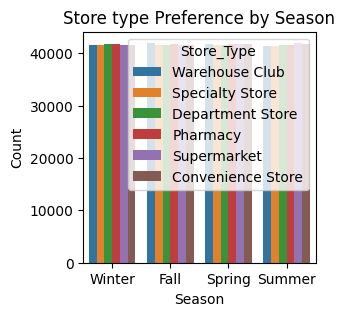

In [ ]:

plt.figure(figsize=(3, 3))
sns.countplot(data=df, x="Season", hue="Store_Type")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Store type Preference by Season")
plt.show()

In [ ]:
# seasonal preferences for certain store types & customer categories
seasonal_preference = df.groupby(["Season", "Customer_Category","Store_Type"]).size()
print(seasonal_preference)


Season  Customer_Category  Store_Type       
Fall    Homemaker          Convenience Store    5234
                           Department Store     5202
                           Pharmacy             5249
                           Specialty Store      5280
                           Supermarket          5228
                                                ... 
Winter  Young Adult        Department Store     5169
                           Pharmacy             5093
                           Specialty Store      5198
                           Supermarket          5215
                           Warehouse Club       5214
Length: 192, dtype: int64


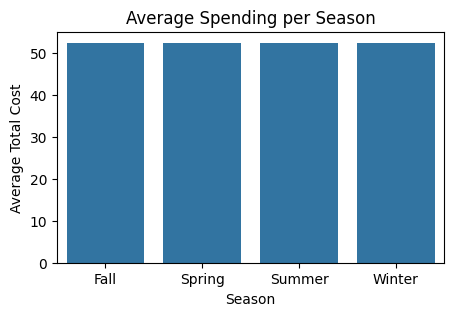

In [ ]:
# plot showing average spending per season
avg_spend_season = df.groupby("Season")["Total_Cost"].mean()
plt.figure(figsize=(5, 3))
sns.barplot(x=avg_spend_season.index, y=avg_spend_season)
plt.title('Average Spending per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Cost')
plt.show()

In [27]:
# City with the highest number of transactions
transactions_per_city = df['City'].value_counts().head(1)
print(transactions_per_city)




City
Seattle    6893
Name: count, dtype: int64


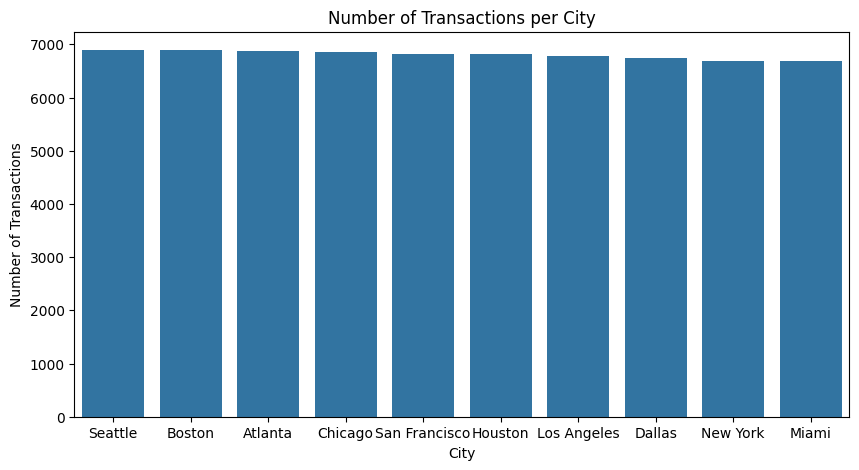

In [28]:
# Bar plot of number of transactions per city
transactions_per_city2 = df['City'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_per_city2.index, y=transactions_per_city2)
plt.title('Number of Transactions per City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.show()

In [30]:
# Top 3 cities by revenue
top_cities_by_revenue = df.groupby('City')['Total_Cost'].sum().sort_values(ascending=False).head(3)
print(top_cities_by_revenue)

City
Chicago    360198.56
Seattle    359681.95
Houston    358970.54
Name: Total_Cost, dtype: float64


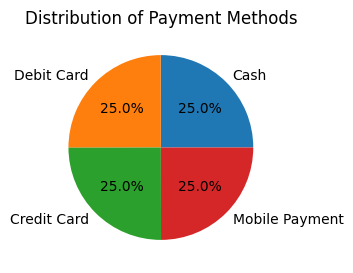

In [ ]:
# Pie chart showing distribution of payment methods
payment_method_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(5, 3))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.show()

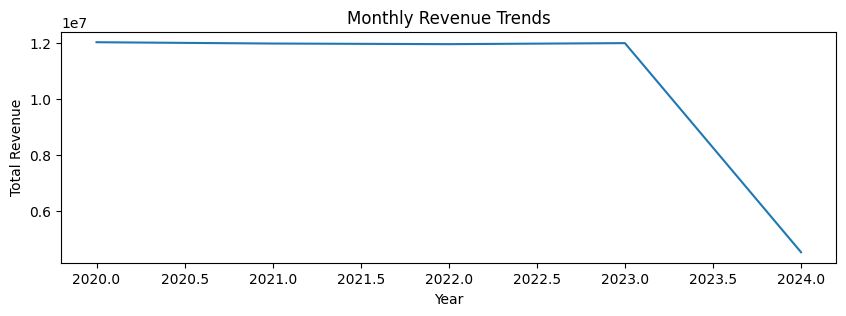

In [ ]:
# Line chart of monthly revenue trends
monthly_revenue = df.groupby(['Year'])['Total_Cost'].sum()
plt.figure(figsize=(10, 3))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue)
plt.title('Monthly Revenue Trends')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


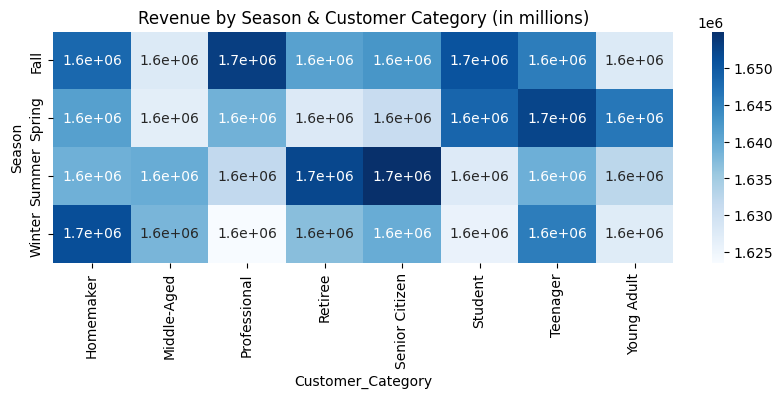

In [ ]:
# Heatmap showing revenue by season and customer category
revenue_by_season = df.groupby(['Season', 'Customer_Category'])['Total_Cost'].sum().unstack()
plt.figure(figsize=(10, 3))
sns.heatmap(revenue_by_season, annot=True, cmap="Blues")
plt.title("Revenue by Season & Customer Category (in millions)")
plt.show()


In [53]:
# Key Takeaways
Key_Takeaways = (f"""
- Focus marketing & inventory on {Best_Season.index[0]} season and top cities of {top_cities_by_revenue.index[0]}, {top_cities_by_revenue.index[1]}, {top_cities_by_revenue.index[2]}
- Scale {Best_promo.index[0]} since it yields the highest revenue and/or average spend.
- Prioritize customer segments like {Top_Customer_categories_avg.index[0]}, {Top_Customer_categories_avg.index[1]}, {Top_Customer_categories_avg.index[2]} who show the highest spending power.
- Optimize store experience for {store_type_season.index[0]}, {store_type_season.index[4]}, {store_type_season.index[8]} where it performs best.
                 """)
print(Key_Takeaways)



- Focus marketing & inventory on Spring season and top cities of Chicago, Seattle, Houston
- Scale Discount on Selected Items since it yields the highest revenue and/or average spend.  
- Prioritize customer segments like Homemaker, Middle-Aged, Professional who show the highest spending power.  
- Optimize store experience for ('Convenience Store', 'Fall'), ('Department Store', 'Fall'), ('Pharmacy', 'Fall') where it performs best.
                 
